Silhouette Score: 0.33078776489960326


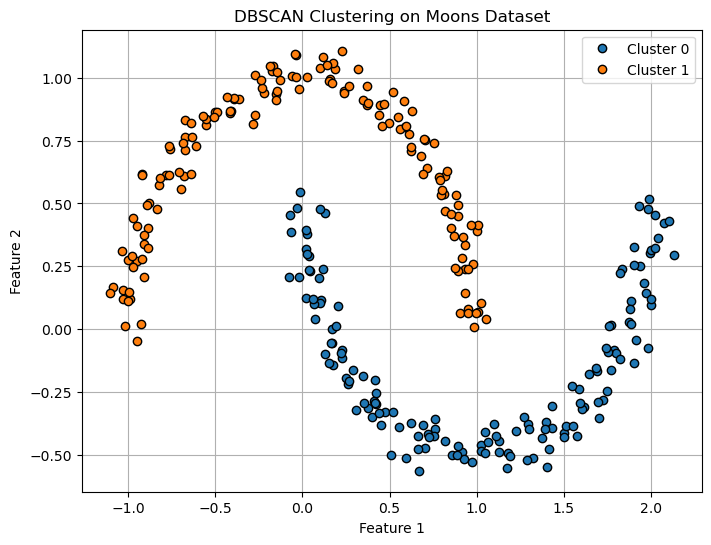

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

# Your custom DBSCAN class here
from dbscan import DBSCAN

# Generate synthetic "moons" dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply custom DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Compute silhouette score if valid
if len(set(labels)) > 1 and -1 not in set(labels):
    score = silhouette_score(X, labels)
    print("Silhouette Score:", score)
else:
    print("Silhouette Score not defined (only one cluster or noise present).")

# Visualization
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.tab10(i) if i != -1 else (0, 0, 0) for i in unique_labels]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6, label=f"Cluster {k}")

plt.title("DBSCAN Clustering on Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
